# Analysis of NBA Points Per Game via Linear Regression

### Load the Data


The training dataset is from [Cengage datasets](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/). Specifically, we will use the Basketball dataset for Multiple Linear Regression, found [here](http://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html).

In [2]:
# Load Packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# View Metadata
metadata = os.path.abspath('./datasets/basketball_mlr_metadata.txt')
with open(metadata, 'r') as txt:
    print(txt.read())

Basketball

The following data (X1, X2, X3, X4, X5) are for each player.
X1 = height in feet
X2 = weight in pounds
X3 = percent of successful field goals (out of 100 attempted)
X4 = percent of successful free throws (out of 100 attempted)
X5 = average points scored per game
Reference: The official NBA basketball Encyclopedia, Villard Books




In [6]:
# Read in the Data as a Pandas Dataframe
data = os.path.abspath('./datasets/basketball_mlr.xls')
df = pd.read_excel(data)

# Tidy up column names
df.columns = ['height', 'weight', 'fg_pct', 'ft_pct', 'ppg']

*** No CODEPAGE record, no encoding_override: will use 'ascii'


In [7]:
df.tail()

,height,weight,fg_pct,ft_pct,ppg
49,5.8,180,0.425,0.872,11.8
50,7.4,240,0.599,0.713,17.1
51,6.8,225,0.482,0.701,11.6
52,6.8,215,0.457,0.734,5.8
53,7.0,230,0.435,0.764,8.3


In [9]:
# Normalize Features
features_df = df.drop(columns='ppg')
features_df_norm = (features_df - features_df.mean()) / features_df.std()

# Asserts features are normalized
moments = [features_df_norm.mean(), features_df_norm.var()]

df_moments = pd.concat(moments, axis=1)
df_moments.columns = ['mean', 'variance']

df_moments

,mean,variance
height,-1.909995e-15,1.0
weight,-3.824102e-16,1.0
fg_pct,-1.755283e-15,1.0
ft_pct,-2.837237e-15,1.0


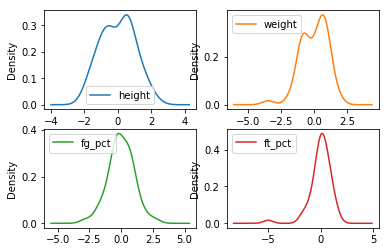

In [7]:
features_df_norm.plot(kind='density', subplots=True, layout=(2, 2), sharex=False)
plt.show()